In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb


In [147]:
df = pd.read_csv('collegePlace.csv')

In [148]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [149]:
df['Gender'].value_counts()

Gender
Male      2475
Female     491
Name: count, dtype: int64

In [150]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


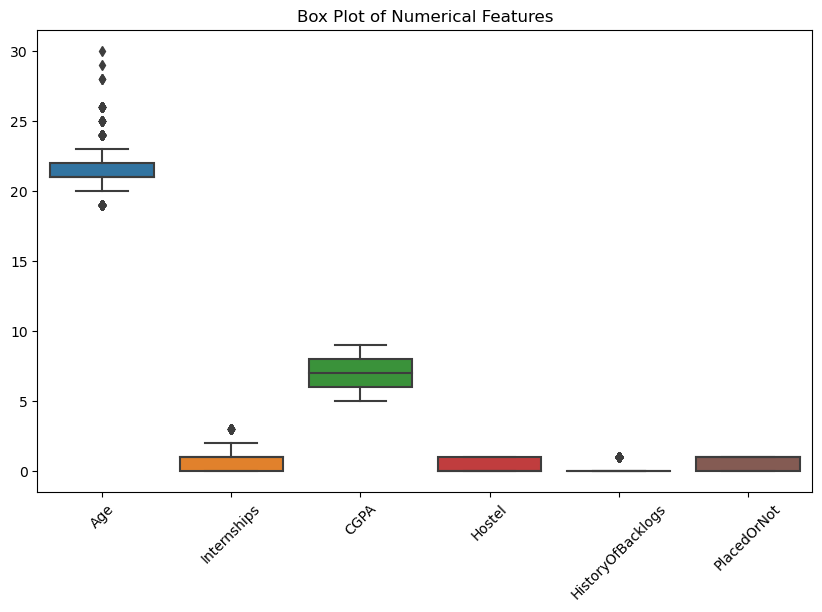

In [151]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()

In [152]:
#We would not be doing outlier removal for this dataset. This is because the dataset reflects real-world scenarios where
# variations in student attributes, such as CGPA, internships,age and backlogs, are expected. 
# Outliers in these attributes could represent exceptional cases or students with unique characteristics that are still relevant
# for placement prediction. Removing these outliers could lead to a biased understanding of the factors influencing
# placements and result in suboptimal predictions.

In [153]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [154]:
df.shape

(2966, 8)

In [155]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [156]:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [158]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [159]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [160]:
# Mapping gender to 0 and 1

gender_map = {'Male': 0, 'Female': 1}

df['Gender'] = df['Gender'].map(gender_map)

In [161]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,Electronics And Communication,1,8,1,1,1
1,21,1,Computer Science,0,7,1,1,1
2,22,1,Information Technology,1,6,0,0,1
3,21,0,Information Technology,0,8,0,1,1
4,22,0,Mechanical,0,8,1,0,1


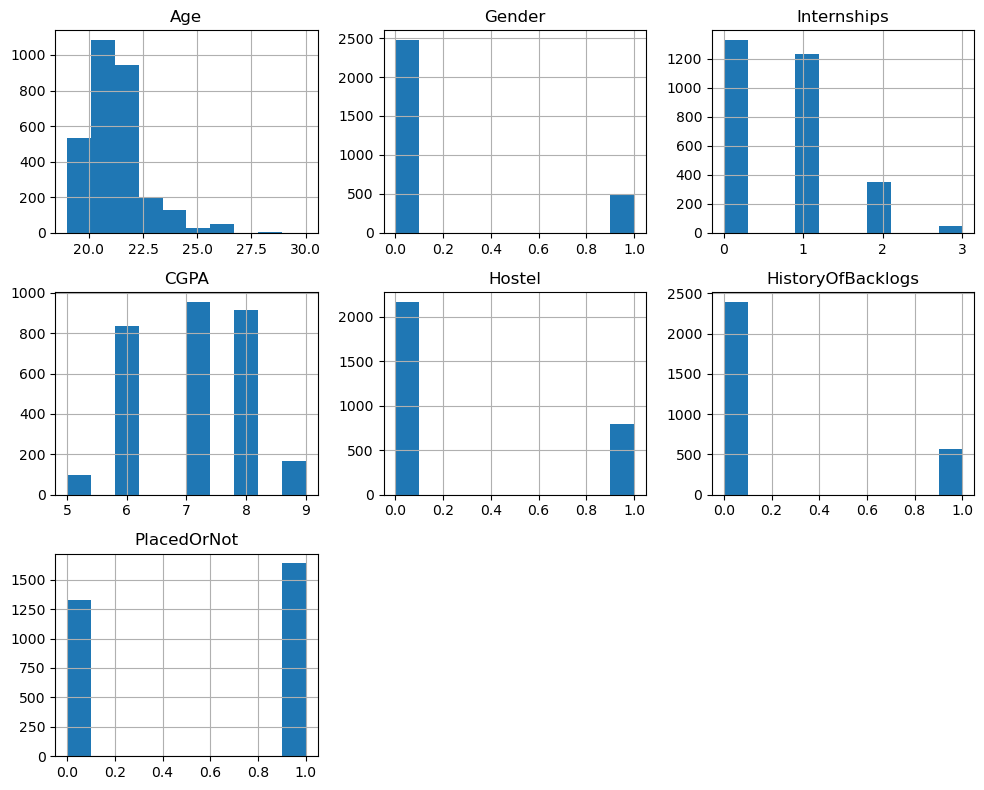

In [162]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

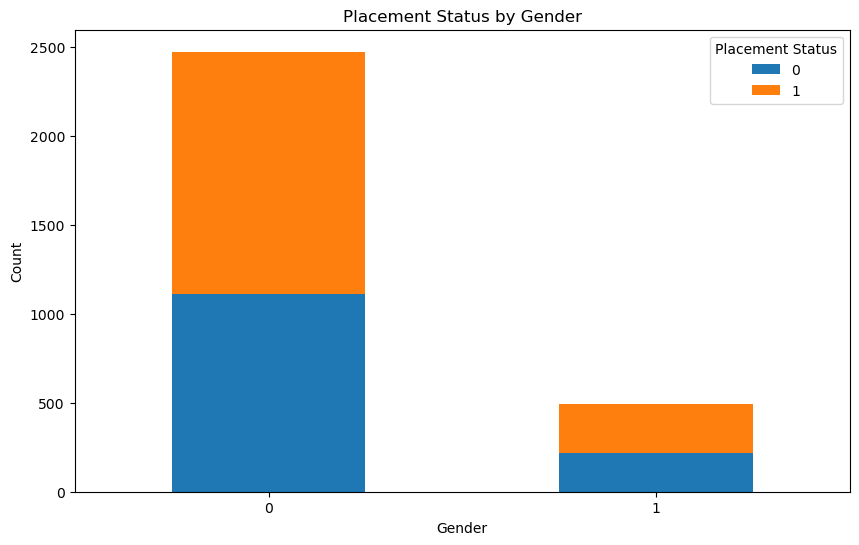

In [163]:
gender_placement_counts =df.groupby('Gender')['PlacedOrNot'].value_counts().unstack()
gender_placement_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Placement Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.legend(title='Placement Status')
plt.show()

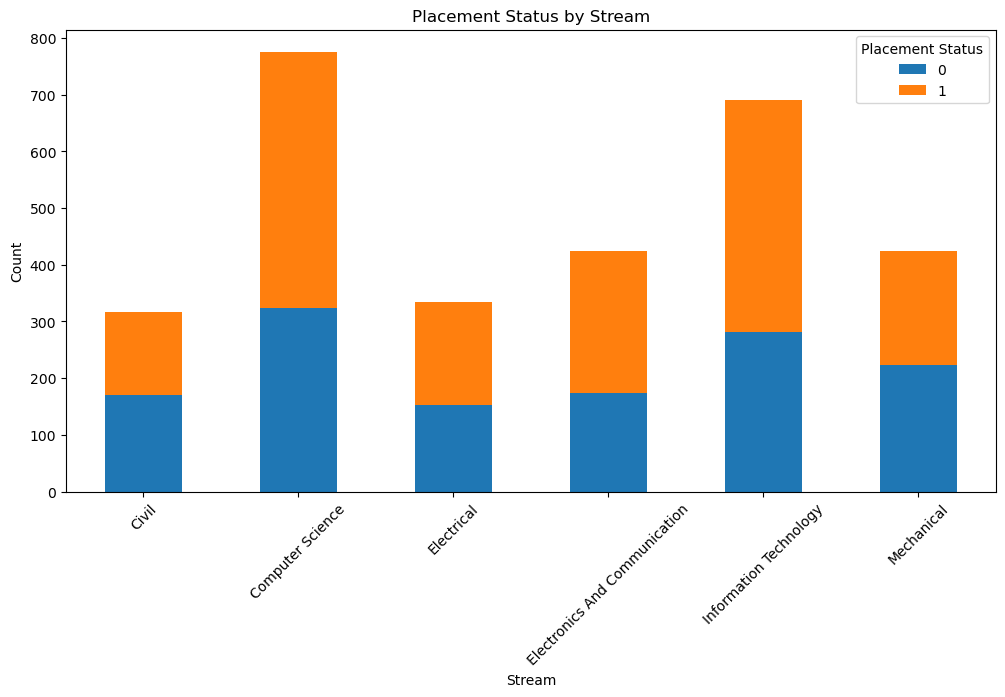

In [164]:
stream_placement_counts = df.groupby('Stream')['PlacedOrNot'].value_counts().unstack()

# Plotting
stream_placement_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Placement Status by Stream')
plt.xlabel('Stream')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Placement Status')
plt.show()


In [165]:
stream_wise=df.groupby('Stream').agg({'Age':'mean',
                                          'Internships' : 'mean',                            
                                           "CGPA":'mean',
                                           'PlacedOrNot':'mean'})

In [166]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [167]:
df.groupby('Hostel')['PlacedOrNot'].value_counts()

Hostel  PlacedOrNot
0       1              1223
        0               945
1       1               416
        0               382
Name: count, dtype: int64

In [168]:
stream_wise

,Age,Internships,CGPA,PlacedOrNot
Stream,,,,
Civil,21.441640,0.545741,7.094637,0.460568
Computer Science,21.559278,0.871134,7.039948,0.582474
Electrical,21.299401,0.607784,7.080838,0.541916
Electronics And Communication,21.410377,0.721698,7.125000,0.591981
Information Technology,21.539797,0.736614,7.073806,0.591896
Mechanical,21.518868,0.518868,7.063679,0.471698


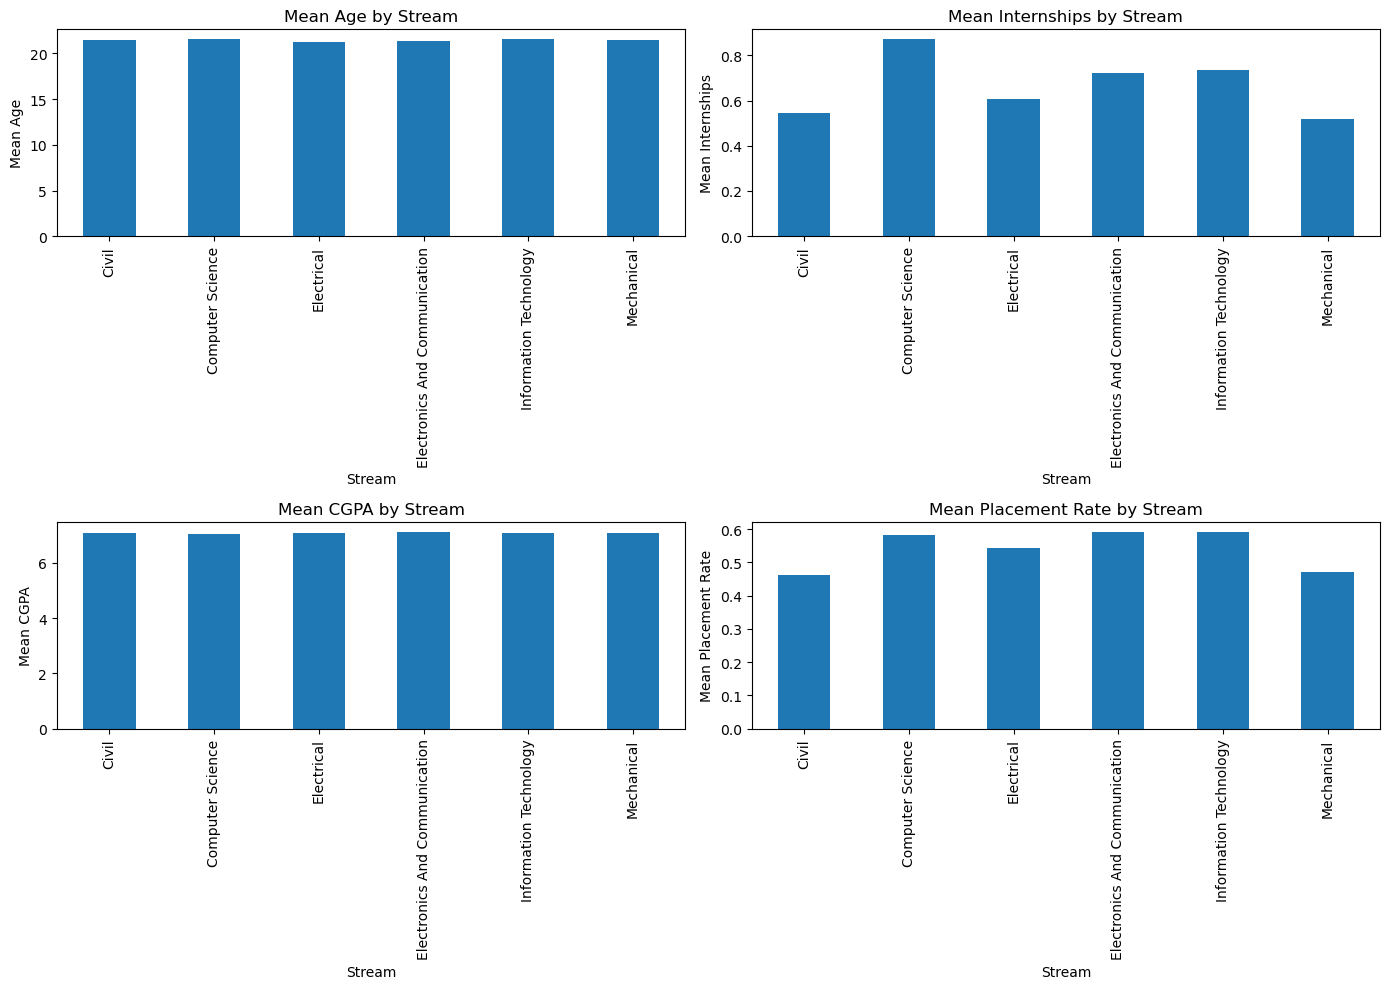

In [169]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))


stream_wise['Age'].plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Mean Age by Stream')
axes[0, 0].set_xlabel('Stream')
axes[0, 0].set_ylabel('Mean Age')


stream_wise['Internships'].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Mean Internships by Stream')
axes[0, 1].set_xlabel('Stream')
axes[0, 1].set_ylabel('Mean Internships')


stream_wise['CGPA'].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Mean CGPA by Stream')
axes[1, 0].set_xlabel('Stream')
axes[1, 0].set_ylabel('Mean CGPA')


stream_wise['PlacedOrNot'].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Mean Placement Rate by Stream')
axes[1, 1].set_xlabel('Stream')
axes[1, 1].set_ylabel('Mean Placement Rate')

plt.tight_layout()
plt.show()

In [170]:
df.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,Electronics And Communication,1,8,1,1,1
1,21,1,Computer Science,0,7,1,1,1
2,22,1,Information Technology,1,6,0,0,1
3,21,0,Information Technology,0,8,0,1,1
4,22,0,Mechanical,0,8,1,0,1
5,22,0,Electronics And Communication,0,6,0,0,0
6,21,0,Computer Science,0,7,0,1,0
7,21,0,Information Technology,1,7,0,0,0
8,21,0,Computer Science,2,6,0,0,1
9,21,1,Computer Science,1,6,1,0,0


In [171]:
# Perform one-hot encoding for the 'stream' column
encoded_df = pd.get_dummies(df['Stream'], drop_first=True)


encoded_df = encoded_df.astype(int)


df_concatenated = pd.concat([df.drop(columns=['Stream']), encoded_df], axis=1)

In [172]:
df_concatenated.head(5)

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,0,1,8,1,1,1,0,0,1,0,0
1,21,1,0,7,1,1,1,1,0,0,0,0
2,22,1,1,6,0,0,1,0,0,0,1,0
3,21,0,0,8,0,1,1,0,0,0,1,0
4,22,0,0,8,1,0,1,0,0,0,0,1


In [173]:
df_concatenated = df_concatenated[['Age', 'Gender',
             'Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical',
             "Internships","CGPA","Hostel",
             'HistoryOfBacklogs', 'PlacedOrNot']]

In [174]:
# WE HAVE RETAINED ALL THE FEATURES AS WHEN WE TRIED TO REMOVE ONE OF THE FEATURE WHICH WAS LESSER RELEVANT TO THE OUTPUT,
# THE ACCURACY OF SOME OF THE MODELS REDUCED A BIT. ALL OTHER FEATURES ARE IMPORTANT FOR THE MODEL AS WE INFERREED BY FEATURE SELECTION.

In [175]:
df_concatenated.head()

,Age,Gender,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,1,0,0,0,0,1,8,1,1,1
1,21,1,0,1,0,0,0,0,7,1,1,1
2,22,1,0,0,1,0,0,1,6,0,0,1
3,21,0,0,0,1,0,0,0,8,0,1,1
4,22,0,0,0,0,1,0,0,8,1,0,1


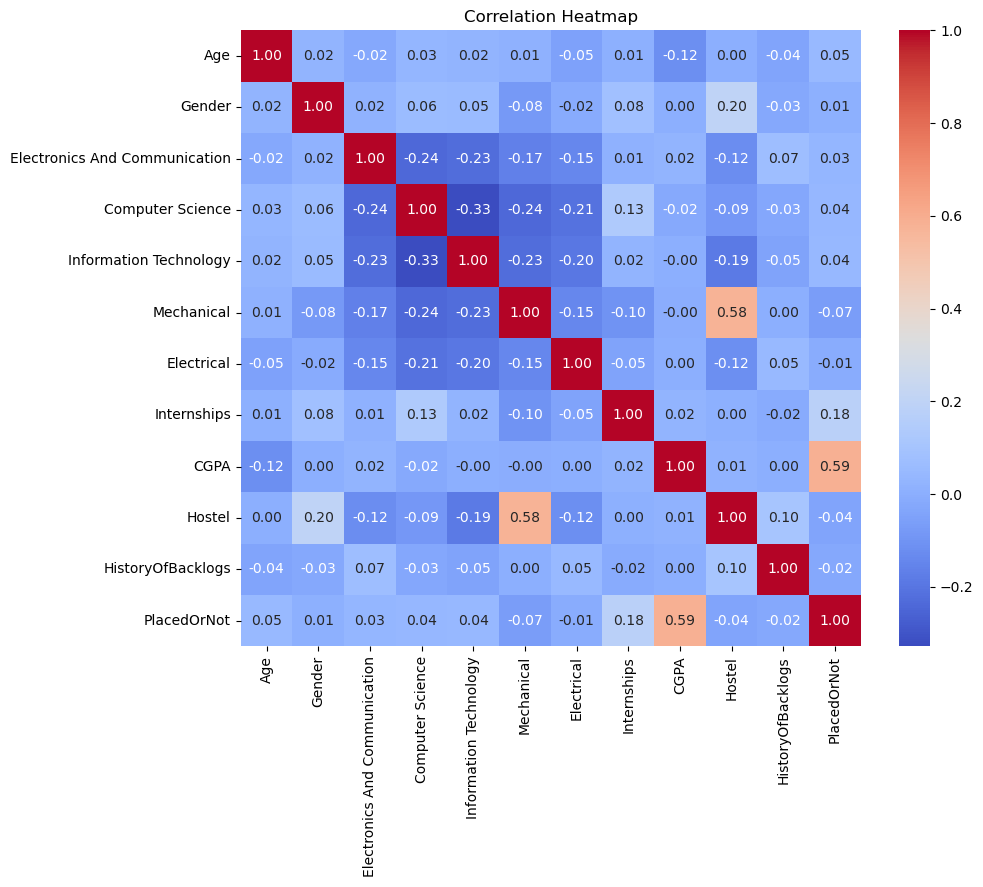

In [176]:
correlation_matrix = df_concatenated.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_concatenated.drop('PlacedOrNot',axis=1))

scaled_data = scaler.transform(df_concatenated.drop('PlacedOrNot',axis=1))

In [178]:
# scaled_data is not a dataframe, it is a numpy array

In [179]:
scaled_data = pd.DataFrame(scaled_data, columns = df_concatenated.columns[:-1])
scaled_data.head()

,Age,Gender,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.35623,0.400445,0.957191,1.648269,2.050246
1,-0.366752,2.245158,-0.408409,1.679930,-0.551123,-0.408409,-0.35623,-0.950773,-0.076310,1.648269,2.050246
2,0.388131,2.245158,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,0.400445,-1.109812,-0.606697,-0.487746
3,-0.366752,-0.445403,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.950773,0.957191,-0.606697,2.050246
4,0.388131,-0.445403,-0.408409,-0.595263,-0.551123,2.448527,-0.35623,-0.950773,0.957191,1.648269,-0.487746


In [180]:
#now we have all the columns with numerical data, so that we can apply our model

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data,
                                                    df_concatenated['PlacedOrNot'],
                                                    test_size = 0.2,
                                                    random_state = 20)

In [183]:
X_train

,Age,Gender,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Internships,CGPA,Hostel,HistoryOfBacklogs
2618,-0.366752,-0.445403,-0.408409,1.679930,-0.551123,-0.408409,-0.35623,-0.950773,0.957191,-0.606697,-0.487746
2700,-1.121634,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.35623,-0.950773,1.990692,-0.606697,-0.487746
1464,0.388131,-0.445403,-0.408409,-0.595263,-0.551123,2.448527,-0.35623,0.400445,-0.076310,1.648269,2.050246
1667,-1.121634,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.35623,-0.950773,-0.076310,-0.606697,-0.487746
1162,0.388131,-0.445403,-0.408409,-0.595263,-0.551123,-0.408409,-0.35623,-0.950773,0.957191,-0.606697,-0.487746
...,...,...,...,...,...,...,...,...,...,...,...
1814,1.143013,-0.445403,-0.408409,1.679930,-0.551123,-0.408409,-0.35623,0.400445,-1.109812,-0.606697,-0.487746
1428,0.388131,2.245158,2.448527,-0.595263,-0.551123,-0.408409,-0.35623,3.102883,-1.109812,-0.606697,-0.487746
2441,-1.876516,-0.445403,-0.408409,-0.595263,-0.551123,-0.408409,-0.35623,-0.950773,-1.109812,-0.606697,-0.487746
271,0.388131,-0.445403,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,0.400445,-0.076310,1.648269,2.050246


In [184]:
y_train

2618    1
2700    1
1464    0
1667    0
1162    1
       ..
1814    0
1428    1
2441    0
271     0
2522    1
Name: PlacedOrNot, Length: 2372, dtype: int64

In [185]:
X_test

,Age,Gender,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Internships,CGPA,Hostel,HistoryOfBacklogs
2499,0.388131,-0.445403,-0.408409,1.679930,-0.551123,-0.408409,-0.356230,1.751664,-1.109812,-0.606697,-0.487746
2956,0.388131,-0.445403,-0.408409,1.679930,-0.551123,-0.408409,-0.356230,-0.950773,0.957191,-0.606697,-0.487746
596,-0.366752,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.356230,-0.950773,0.957191,-0.606697,-0.487746
735,3.407659,-0.445403,-0.408409,-0.595263,-0.551123,-0.408409,-0.356230,-0.950773,1.990692,-0.606697,-0.487746
2136,-1.876516,-0.445403,-0.408409,-0.595263,-0.551123,-0.408409,2.807176,-0.950773,-2.143313,-0.606697,-0.487746
...,...,...,...,...,...,...,...,...,...,...,...
2819,0.388131,-0.445403,-0.408409,-0.595263,-0.551123,2.448527,-0.356230,-0.950773,-1.109812,1.648269,-0.487746
2417,-1.121634,-0.445403,-0.408409,1.679930,-0.551123,-0.408409,-0.356230,-0.950773,-0.076310,-0.606697,-0.487746
2135,-0.366752,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.356230,0.400445,-0.076310,-0.606697,2.050246
931,-0.366752,-0.445403,-0.408409,1.679930,-0.551123,-0.408409,-0.356230,0.400445,0.957191,-0.606697,-0.487746


In [186]:
y_test

2499    1
2956    1
596     1
735     1
2136    0
       ..
2819    0
2417    0
2135    1
931     1
782     1
Name: PlacedOrNot, Length: 594, dtype: int64

In [187]:
# here we try to get the most optimised parameters using grid-search cv for our models.
from sklearn.model_selection import GridSearchCV
lr2= LogisticRegression()
rf2= RandomForestClassifier()
svc2 = SVC()
xgb_model2 = XGBClassifier()


# Hyperparameter grid for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Penalty term
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2]  # Learning rate
}


grid_search_lr = GridSearchCV(estimator=lr2, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(estimator=rf2, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_svc = GridSearchCV(estimator=svc2, param_grid=param_grid_svc, cv=5, scoring='accuracy')
grid_search_xgb = GridSearchCV(estimator=xgb_model2, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

grid_search_lr.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)


print("Logistic Regression - Best Parameters:", grid_search_lr.best_params_)
print("Logistic Regression - Best Score:", grid_search_lr.best_score_)

print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best Score:", grid_search_rf.best_score_)

print("Support Vector Classifier - Best Parameters:", grid_search_svc.best_params_)
print("Support Vector Classifier - Best Score:", grid_search_svc.best_score_)

print("XGBoost - Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost - Best Score:", grid_search_xgb.best_score_)


Logistic Regression - Best Parameters: {'C': 10, 'penalty': 'l2'}
Logistic Regression - Best Score: 0.7588771929824562
Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - Best Score: 0.885340439706862
Support Vector Classifier - Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Classifier - Best Score: 0.8726973129025094
XGBoost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
XGBoost - Best Score: 0.8882949145014434


In [188]:
# LOGISTIC REGRESSION

LRmodel = LogisticRegression(C=10, penalty='l2')

# Training the model
LRmodel.fit(X_train, y_train)

# Making predictions
y_pred_lr = LRmodel.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.7828282828282829


In [189]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       271
           1       0.80      0.80      0.80       323

    accuracy                           0.78       594
   macro avg       0.78      0.78      0.78       594
weighted avg       0.78      0.78      0.78       594



In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
# K-NEAREST NEIGHBOURS

KNNmodel = KNeighborsClassifier()

In [192]:
# Training the model
KNNmodel.fit(X_train, y_train)

# Making predictions
y_pred = KNNmodel.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


In [193]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       271
           1       0.84      0.85      0.85       323

    accuracy                           0.83       594
   macro avg       0.83      0.83      0.83       594
weighted avg       0.83      0.83      0.83       594



In [194]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[220  51]
 [ 48 275]]


In [195]:
from sklearn.naive_bayes import GaussianNB

In [196]:
# NAIVE BAYES

nbmodel = GaussianNB()

# Training the model
nbmodel.fit(X_train, y_train)

# Making predictions
y_pred = nbmodel.predict(X_test)

In [197]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [198]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7946127946127947


In [199]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       271
           1       0.80      0.83      0.81       323

    accuracy                           0.79       594
   macro avg       0.79      0.79      0.79       594
weighted avg       0.79      0.79      0.79       594



In [200]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[204  67]
 [ 55 268]]


In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
# RANDOM FOREST CLASSIFIER

rfmodel = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2)

# Train the model
rfmodel.fit(X_train, y_train)

# Make predictions
y_pred = rfmodel.predict(X_test)


In [203]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8787878787878788

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       271
           1       0.91      0.86      0.88       323

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594


Confusion Matrix:
[[245  26]
 [ 46 277]]


In [204]:
from sklearn.svm import SVC


In [205]:
# SUPPORT VECTOR CLASSIFIER

svcmodel = SVC(kernel='rbf',gamma='scale', C=10)  

# Train the model
svcmodel.fit(X_train, y_train)

# Make predictions
y_pred = svcmodel.predict(X_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8468013468013468

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       271
           1       0.90      0.81      0.85       323

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.85      0.85      0.85       594


Confusion Matrix:
[[241  30]
 [ 61 262]]


In [375]:
!pip install xgboost



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [207]:
from xgboost import XGBClassifier

In [208]:
# XGBOOST CLASSIFIER

xgb_model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=100)

In [209]:
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)


In [210]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8905723905723906

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       271
           1       0.94      0.85      0.89       323

    accuracy                           0.89       594
   macro avg       0.89      0.89      0.89       594
weighted avg       0.90      0.89      0.89       594


Confusion Matrix:
[[253  18]
 [ 47 276]]


KNN Precision: 0.8449564134495642, Recall: 0.8279438682123246, F1 Score: 0.8363636363636363
SVC Precision: 0.912125340599455, Recall: 0.8169615619280048, F1 Score: 0.8619246861924685
XGB Precision: 0.9295392953929539, Recall: 0.8370957901159244, F1 Score: 0.8808988764044944
RF Precision: 0.917900403768506, Recall: 0.8322147651006712, F1 Score: 0.8729600000000001
LR Precision: 0.7790419161676647, Recall: 0.7937766931055522, F1 Score: 0.7863402840737382
GNB Precision: 0.7861339600470035, Recall: 0.8163514338010982, F1 Score: 0.8009577970667464


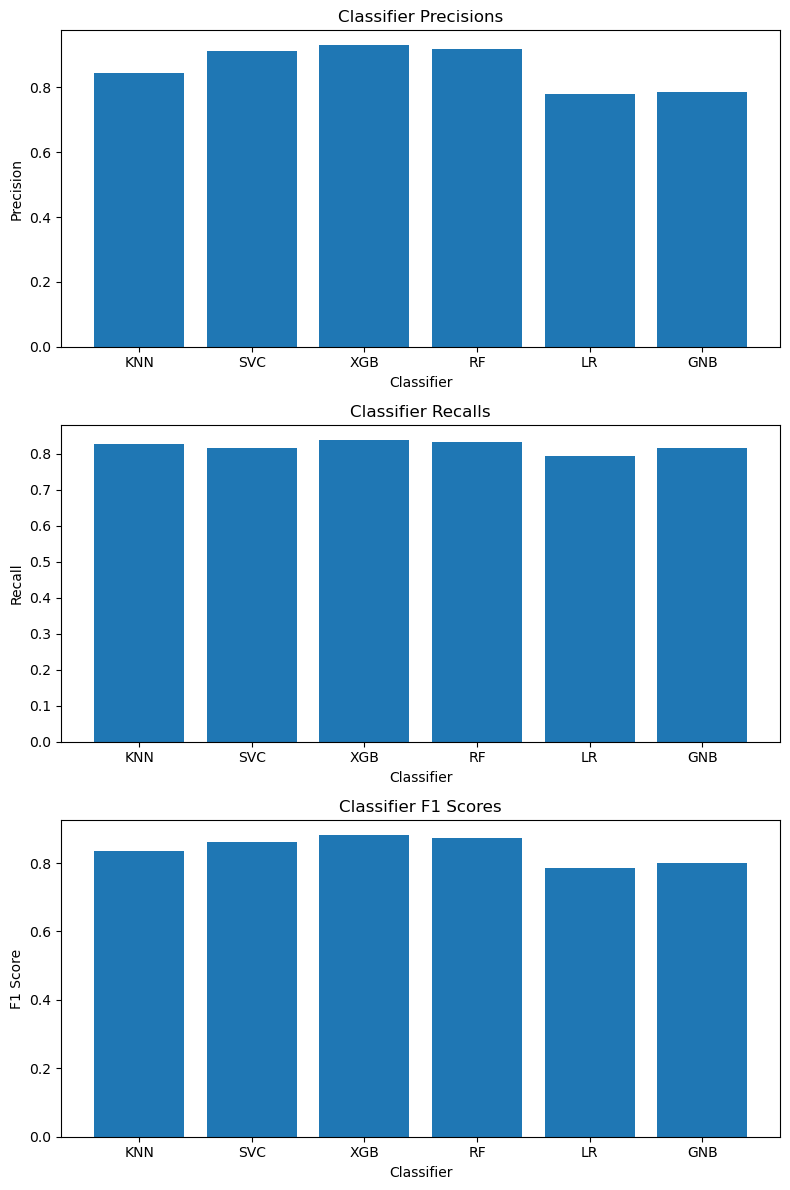

In [219]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Initializing the classifiers
knn = KNeighborsClassifier()
svc = SVC(C=10, kernel='rbf', gamma='scale')
xgb = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=100)
rf = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2)
lr = LogisticRegression(C=10, penalty='l2')
gnb = GaussianNB()

classifiers = [knn, svc, xgb, rf, lr, gnb]

# Define lists to store metrics
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation and compute metrics for each classifier
for clf in classifiers:
    y_pred = cross_val_predict(clf, scaled_data, df_concatenated['PlacedOrNot'], cv=5)  # Predictions using cross-validation
    precisions.append(precision_score(df_concatenated['PlacedOrNot'], y_pred))
    recalls.append(recall_score(df_concatenated['PlacedOrNot'], y_pred))
    f1_scores.append(f1_score(df_concatenated['PlacedOrNot'], y_pred))

# Print the metrics
for i, clf_name in enumerate(['KNN', 'SVC', 'XGB', 'RF', 'LR', 'GNB']):
    print(f'{clf_name} Precision: {precisions[i]}, Recall: {recalls[i]}, F1 Score: {f1_scores[i]}')

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].bar(['KNN', 'SVC', 'XGB', 'RF', 'LR', 'GNB'], precisions)
ax[0].set_title('Classifier Precisions')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision')

ax[1].bar(['KNN', 'SVC', 'XGB', 'RF', 'LR', 'GNB'], recalls)
ax[1].set_title('Classifier Recalls')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall')

ax[2].bar(['KNN', 'SVC', 'XGB', 'RF', 'LR', 'GNB'], f1_scores)
ax[2].set_title('Classifier F1 Scores')
ax[2].set_xlabel('Classifier')
ax[2].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


In [220]:
# trying to create an ensamble to naive bayes and decision tree, as one of our suggested models.

In [221]:
#optimise parameters for decsion tree 

from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Adjust as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier()


grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8819666888740839


In [222]:
# now creating an ensamble of the two.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5) 
# nbmodel is already defined above in the notebook

ensemble_model = VotingClassifier(estimators=[('nb', nbmodel), ('dt', dtmodel)], voting='soft')


ensemble_model.fit(X_train, y_train)


ensemble_pred = ensemble_model.predict(X_test)


accuracy_ensemble = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", accuracy_ensemble)


Ensemble Accuracy: 0.8804713804713805


In [223]:
from sklearn.ensemble import StackingClassifier
stacking_classifier = StackingClassifier(
    estimators=[('svm', svcmodel), ('logistic', LRmodel)],
    final_estimator=LogisticRegression(),  # You can use any final estimator, here we use Logistic Regression
    cv=5  # Number of cross-validation folds
)

# Fit the stacking classifier to the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = stacking_classifier.predict(X_test)

# Evaluate the performance of the stacking classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8451178451178452


In [224]:
# NOW WE WILL TEST OUR MODELS ON A ALTOGETHER DIFFERENT DATASET
# THE DATASET WILL HAVE A DIFFERENT DISTRIBUTION THAN THAT ON WHICH OUR MODEL WAS TRAINED ON
# THIS WILL HELP US TO CHECK IF OUR MODELS GENERALIZES OR NOT
# WE WILL MAKE PREDICTION USING ALL THE MODELS WHICH WE TRAINED USING OUR ORIGINAL DATASET 

In [225]:
test_data_new = pd.read_excel('COLLEGE_PLACEMENT_NEW.xlsx')

In [226]:
test_data_new.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender,Stream
0,21,0,7.647421,0,0,0,0,Civil
1,23,1,6.078687,0,1,1,1,Computer Science
2,22,2,6.578300,1,0,1,1,Computer Science
3,22,2,8.561997,0,0,1,0,Computer Science
4,23,0,6.932521,1,0,1,0,Mechanical


In [227]:
test_data_new.shape

(500, 8)

In [228]:
test_data_new.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,21.49800,0.862000,7.049024,0.414000,0.370000,0.556000,0.300000
std,1.04699,0.827239,0.996792,0.493042,0.483288,0.497352,0.458717
min,19.00000,0.000000,4.288132,0.000000,0.000000,0.000000,0.000000
25%,21.00000,0.000000,6.376376,0.000000,0.000000,0.000000,0.000000
50%,21.50000,1.000000,6.975834,0.000000,0.000000,1.000000,0.000000
75%,22.00000,1.000000,7.693325,1.000000,1.000000,1.000000,1.000000
max,24.00000,4.000000,9.760567,1.000000,1.000000,1.000000,1.000000


In [229]:
test_data_new.isnull().sum()

Age                  0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
Gender               0
Stream               0
dtype: int64

In [230]:
streamwisemean=test_data_new.groupby('Stream').agg({'Age':'mean',
                                          'Internships' : 'mean',                            
                                           "CGPA":'mean',
                                           'PlacedOrNot':'mean'})

In [231]:
streamwisemean

,Age,Internships,CGPA,PlacedOrNot
Stream,,,,
Civil,21.096774,0.064516,7.649971,0.354839
Computer Science,22.078534,1.549738,6.882294,0.643979
Electrical,20.408759,0.525547,6.977806,0.496350
Electronics And Communication,20.883721,1.325581,7.911830,0.837209
Information Technology,22.250000,1.000000,8.466646,1.000000
Mechanical,22.287234,0.000000,6.838404,0.382979


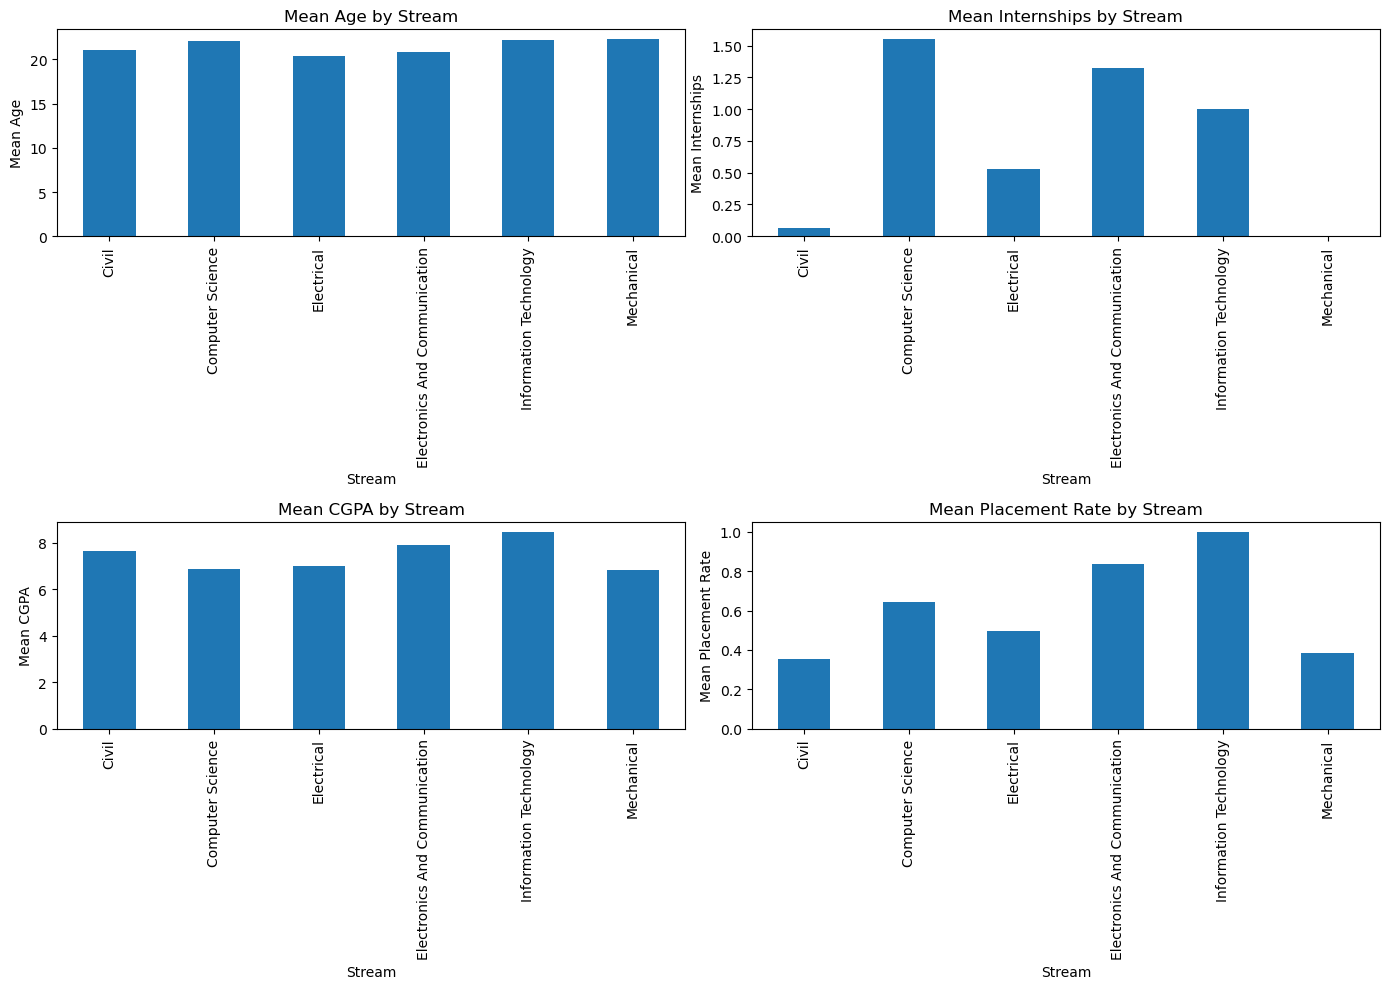

In [232]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

streamwisemean['Age'].plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Mean Age by Stream')
axes[0, 0].set_xlabel('Stream')
axes[0, 0].set_ylabel('Mean Age')


streamwisemean['Internships'].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Mean Internships by Stream')
axes[0, 1].set_xlabel('Stream')
axes[0, 1].set_ylabel('Mean Internships')


streamwisemean['CGPA'].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Mean CGPA by Stream')
axes[1, 0].set_xlabel('Stream')
axes[1, 0].set_ylabel('Mean CGPA')


streamwisemean['PlacedOrNot'].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Mean Placement Rate by Stream')
axes[1, 1].set_xlabel('Stream')
axes[1, 1].set_ylabel('Mean Placement Rate')

plt.tight_layout()
plt.show()

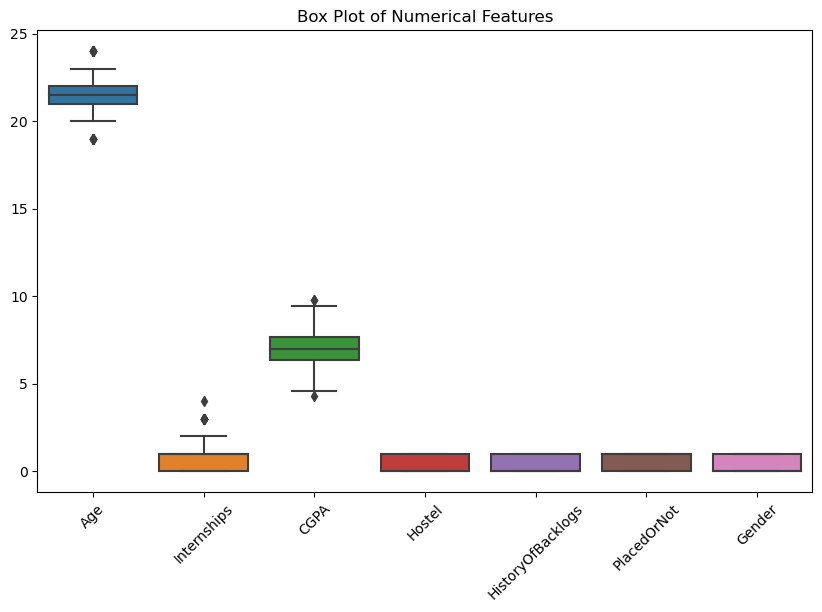

In [233]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_data_new)
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()

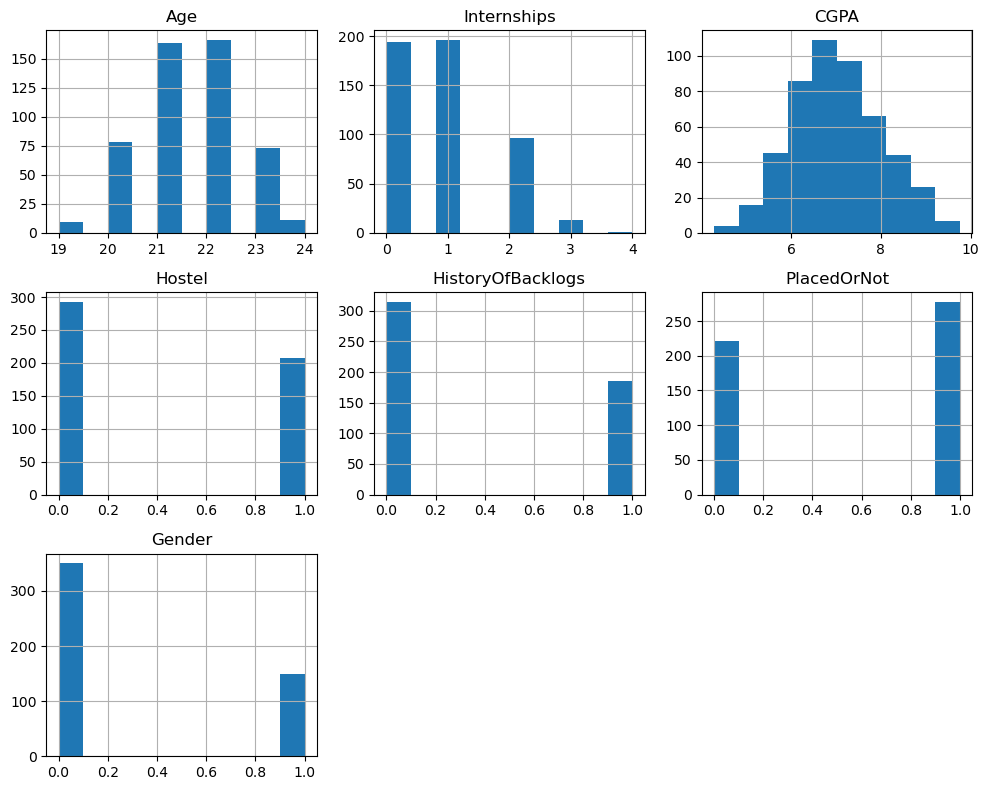

In [234]:
test_data_new.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [235]:
test_data_new.groupby('Stream')['HistoryOfBacklogs'].value_counts()

Stream                         HistoryOfBacklogs
Civil                          0                     23
                               1                      8
Computer Science               0                    118
                               1                     73
Electrical                     0                     87
                               1                     50
Electronics And Communication  0                     31
                               1                     12
Information Technology         0                      4
Mechanical                     0                     52
                               1                     42
Name: count, dtype: int64

In [236]:
test_data_new['CGPA'] = test_data_new['CGPA'].round().astype(int)

In [237]:
# Perform one-hot encoding for the 'stream' column
encoded_test_data = pd.get_dummies(test_data_new['Stream'], drop_first=True)


encoded_test_data = encoded_test_data.astype(int)

test_data_concat = pd.concat([test_data_new.drop(columns=['Stream']), encoded_test_data], axis=1)

In [238]:
test_data_concat

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,21,0,8,0,0,0,0,0,0,0,0,0
1,23,1,6,0,1,1,1,1,0,0,0,0
2,22,2,7,1,0,1,1,1,0,0,0,0
3,22,2,9,0,0,1,0,1,0,0,0,0
4,23,0,7,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,22,0,7,1,1,1,1,0,0,0,0,1
496,24,0,7,0,1,0,0,0,0,0,0,1
497,22,1,7,0,0,1,0,1,0,0,0,0
498,23,1,9,1,0,1,1,1,0,0,0,0


In [239]:
test_data_concat.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
Age,1.000000,0.035545,-0.054663,0.077309,0.062853,0.017534,0.026288,0.436372,-0.639769,-0.180150,0.064565,0.363077
Internships,0.035545,1.000000,0.050892,0.047002,0.012682,0.186865,-0.017428,0.654281,-0.250112,0.172070,0.014996,-0.501894
CGPA,-0.054663,0.050892,1.000000,-0.151542,-0.241697,0.460074,0.047480,-0.127288,-0.038634,0.252616,0.103353,-0.108133
Hostel,0.077309,0.047002,-0.151542,1.000000,-0.181578,-0.041614,0.034557,0.082952,-0.033849,-0.098513,0.015680,0.063229
HistoryOfBacklogs,0.062853,0.012682,-0.241697,-0.181578,1.000000,-0.190593,-0.013559,0.019865,-0.006409,-0.057771,-0.068821,0.076549
PlacedOrNot,0.017534,0.186865,0.460074,-0.041614,-0.190593,1.000000,0.075542,0.139216,-0.073754,0.173611,0.080250,-0.167560
Gender,0.026288,-0.017428,0.047480,0.034557,-0.013559,0.075542,1.000000,-0.020660,-0.000979,0.017123,0.039193,-0.002234
Computer Science,0.436372,0.654281,-0.127288,0.082952,0.019865,0.139216,-0.020660,1.000000,-0.482997,-0.241165,-0.070604,-0.378302
Electrical,-0.639769,-0.250112,-0.038634,-0.033849,-0.006409,-0.073754,-0.000979,-0.482997,1.000000,-0.188444,-0.055169,-0.295602
Electronics And Communication,-0.180150,0.172070,0.252616,-0.098513,-0.057771,0.173611,0.017123,-0.241165,-0.188444,1.000000,-0.027546,-0.147597


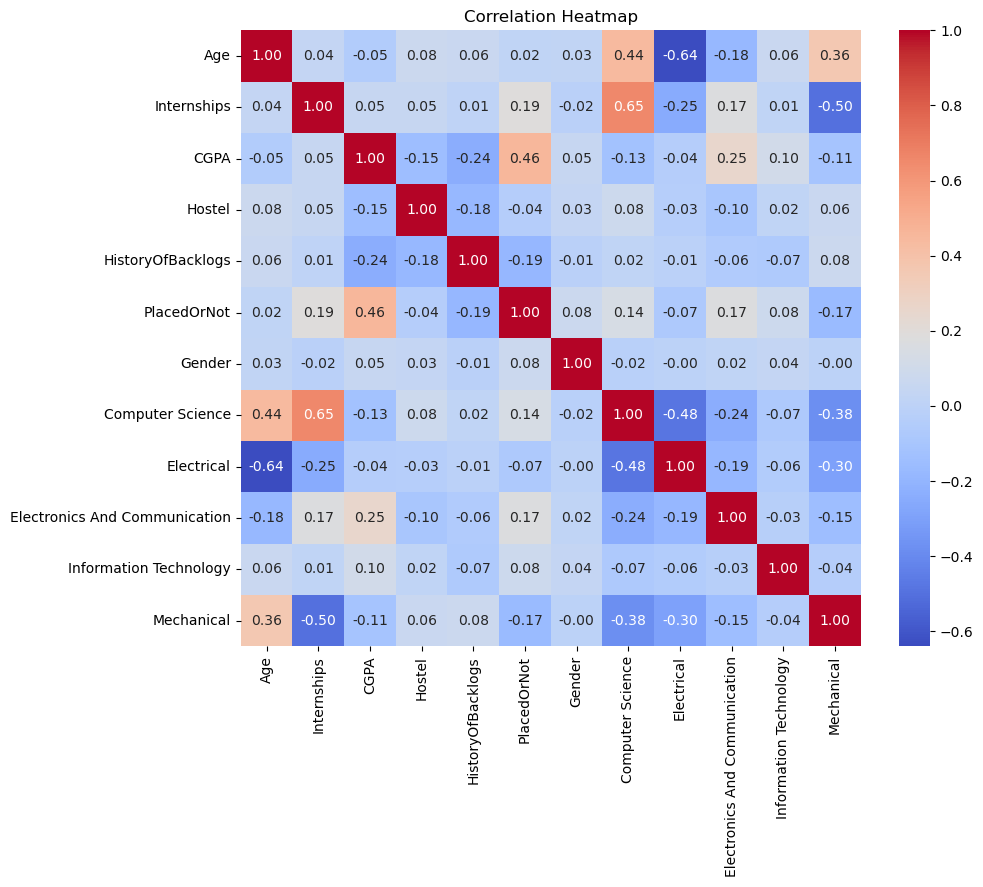

In [240]:
correlation_matrix = test_data_concat.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [241]:
actualout_test= test_data_concat['PlacedOrNot']

In [242]:
actualout_test

0      0
1      1
2      1
3      1
4      1
      ..
495    1
496    0
497    1
498    1
499    1
Name: PlacedOrNot, Length: 500, dtype: int64

In [243]:
test_data_concat= test_data_concat[['Age', 'Gender',
             'Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical',
             "Internships","CGPA",'Hostel',
             'HistoryOfBacklogs', 'PlacedOrNot']]

In [244]:
test_data_concat

,Age,Gender,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,21,0,0,0,0,0,0,0,8,0,0,0
1,23,1,0,1,0,0,0,1,6,0,1,1
2,22,1,0,1,0,0,0,2,7,1,0,1
3,22,0,0,1,0,0,0,2,9,0,0,1
4,23,0,0,0,0,1,0,0,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,22,1,0,0,0,1,0,0,7,1,1,1
496,24,0,0,0,0,1,0,0,7,0,1,0
497,22,0,0,1,0,0,0,1,7,0,0,1
498,23,1,0,1,0,0,0,1,9,1,0,1


In [245]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()

scaler2.fit(test_data_concat.drop('PlacedOrNot',axis=1))

scaled_test_data = scaler2.transform(test_data_concat.drop('PlacedOrNot',axis=1))


In [246]:
scaled_test_data

array([[-0.47612554, -0.65465367, -0.30674404, ...,  0.91231342,
        -0.84052641, -0.76635604],
       [ 1.43602521,  1.52752523, -0.30674404, ..., -0.99629207,
        -0.84052641,  1.30487651],
       [ 0.47994984,  1.52752523, -0.30674404, ..., -0.04198932,
         1.18973062, -0.76635604],
       ...,
       [ 0.47994984, -0.65465367, -0.30674404, ..., -0.04198932,
        -0.84052641, -0.76635604],
       [ 1.43602521,  1.52752523, -0.30674404, ...,  1.86661617,
         1.18973062, -0.76635604],
       [-1.43220091, -0.65465367, -0.30674404, ...,  0.91231342,
         1.18973062,  1.30487651]])

In [247]:
scaled_test_data = pd.DataFrame(scaled_test_data, columns = test_data_concat.columns[:-1])
scaled_test_data

,Age,Gender,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Internships,CGPA,Hostel,HistoryOfBacklogs
0,-0.476126,-0.654654,-0.306744,-0.786208,-0.089803,-0.481173,-0.614337,-1.043064,0.912313,-0.840526,-0.766356
1,1.436025,1.527525,-0.306744,1.271928,-0.089803,-0.481173,-0.614337,0.166987,-0.996292,-0.840526,1.304877
2,0.479950,1.527525,-0.306744,1.271928,-0.089803,-0.481173,-0.614337,1.377038,-0.041989,1.189731,-0.766356
3,0.479950,-0.654654,-0.306744,1.271928,-0.089803,-0.481173,-0.614337,1.377038,1.866616,-0.840526,-0.766356
4,1.436025,-0.654654,-0.306744,-0.786208,-0.089803,2.078256,-0.614337,-1.043064,-0.041989,1.189731,-0.766356
...,...,...,...,...,...,...,...,...,...,...,...
495,0.479950,1.527525,-0.306744,-0.786208,-0.089803,2.078256,-0.614337,-1.043064,-0.041989,1.189731,1.304877
496,2.392101,-0.654654,-0.306744,-0.786208,-0.089803,2.078256,-0.614337,-1.043064,-0.041989,-0.840526,1.304877
497,0.479950,-0.654654,-0.306744,1.271928,-0.089803,-0.481173,-0.614337,0.166987,-0.041989,-0.840526,-0.766356
498,1.436025,1.527525,-0.306744,1.271928,-0.089803,-0.481173,-0.614337,0.166987,1.866616,1.189731,-0.766356


In [248]:
# Making predictions using LR model
pred_LR = LRmodel.predict(scaled_test_data)


accuracy_test_lr = accuracy_score(actualout_test, pred_LR)
print("Accuracy:", accuracy_test_lr)

Accuracy: 0.714


In [249]:
print("\nClassification Report:")
print(classification_report(actualout_test, pred_LR))



Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       222
           1       0.76      0.72      0.74       278

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.72      0.71      0.71       500



In [250]:
# NAVIVE BAYES

pred_GNB = nbmodel.predict(scaled_test_data)


accuracy_test_GNB = accuracy_score(actualout_test, pred_GNB)
print("Accuracy:", accuracy_test_GNB)

Accuracy: 0.702


In [251]:
print("\nClassification Report:")
print(classification_report(actualout_test, pred_GNB))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       222
           1       0.76      0.67      0.72       278

    accuracy                           0.70       500
   macro avg       0.70      0.71      0.70       500
weighted avg       0.71      0.70      0.70       500



In [252]:
# K NEAREST NEIGHBOUR

pred_knn = KNNmodel.predict(scaled_test_data)


accuracy_test_KNN = accuracy_score(actualout_test, pred_knn)
print("Accuracy:", accuracy_test_KNN)

Accuracy: 0.646


In [253]:
print("\nClassification Report:")
print(classification_report(actualout_test, pred_knn))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       222
           1       0.69      0.67      0.68       278

    accuracy                           0.65       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.65      0.65      0.65       500



In [254]:
# RANDOM FOREST

pred_rf = rfmodel.predict(scaled_test_data)


accuracy_test_rf = accuracy_score(actualout_test, pred_rf)
print("Accuracy:", accuracy_test_rf)

Accuracy: 0.654


In [255]:
print("\nClassification Report:")
print(classification_report(actualout_test, pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       222
           1       0.72      0.61      0.66       278

    accuracy                           0.65       500
   macro avg       0.66      0.66      0.65       500
weighted avg       0.67      0.65      0.65       500



In [256]:
# SUPPORT VECTOR CLASSIFIER

pred_svc = svcmodel.predict(scaled_test_data)


accuracy_test_svc = accuracy_score(actualout_test, pred_svc)
print("Accuracy:", accuracy_test_svc)

Accuracy: 0.666


In [257]:
print("\nClassification Report:")
print(classification_report(actualout_test, pred_svc))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       222
           1       0.74      0.62      0.67       278

    accuracy                           0.67       500
   macro avg       0.67      0.67      0.67       500
weighted avg       0.68      0.67      0.67       500



In [258]:
# XGBOOST

pred_xgb = xgb_model.predict(scaled_test_data)


accuracy_test_xgb = accuracy_score(actualout_test, pred_xgb)
print("Accuracy:", accuracy_test_xgb)

Accuracy: 0.564


In [259]:
print("\nClassification Report:")
print(classification_report(actualout_test, pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.95      0.66       222
           1       0.87      0.26      0.39       278

    accuracy                           0.56       500
   macro avg       0.69      0.60      0.53       500
weighted avg       0.71      0.56      0.51       500



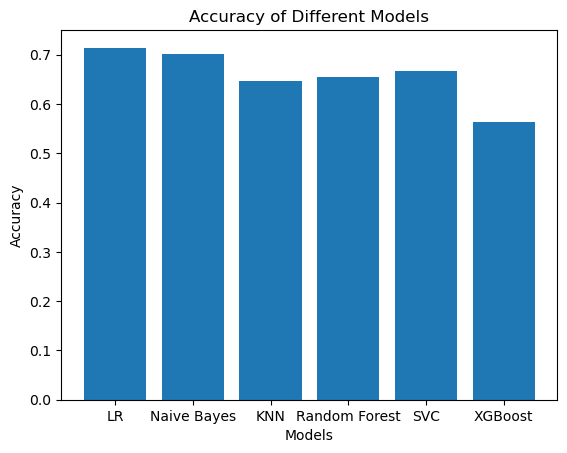

In [260]:
models = ['LR', 'Naive Bayes', 'KNN', 'Random Forest', 'SVC', 'XGBoost']
accuracies = [accuracy_test_lr, accuracy_test_GNB, accuracy_test_KNN, accuracy_test_rf, accuracy_test_svc, accuracy_test_xgb]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

In [261]:
# accuracies came out lesser since the models were trained on a data with a different distribution as compared to this test data.
# hence it may not generalise that well on this data.
# while the data on which models were trained, we observed that XGBoost was the most accurate.
# whereas in this test data, it is the worse performing out of the 6 models.

In [262]:
 # USING THE ENSAMBLE MODEL OF NAIVE BAYES AND DECISION TREE
enspred = ensemble_model.predict(scaled_test_data)

# Calculate accuracy for the ensemble
accuracy_ensemble_test = accuracy_score(actualout_test, enspred)
print("Ensemble Accuracy:", accuracy_ensemble_test)

Ensemble Accuracy: 0.664


In [263]:
# USING THE LOGISTIC REGRESSION OF NAIVE BAYES AND LOGISTIC REGRESSION

stkprd = stacking_classifier.predict(scaled_test_data)
accuracy_stack_test = accuracy_score(actualout_test, stkprd)
print("Ensemble Accuracy:", accuracy_stack_test)


Ensemble Accuracy: 0.66


In [ ]:
# we observed that our proposed ensamble models performed average for the given test dataset, where normal models like
# Naive Bayes and Logistic regression performed better than it.
# It might be the case though, that it will perform better on some other datasets, as it is highly dependent on the distribution of both training and testing data.